In [ ]:
pip install pyodbc pandas matplotlib seaborn


In [ ]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine

# Set up the connection
server = 'localhost\\SQLEXPRESS'
database = 'RetailSalesDB'
driver = 'ODBC Driver 17 for SQL Server'

# Create the connection string
connection_string = (
    f"mssql+pyodbc://{server}/{database}"
    f"?driver={driver.replace(' ', '+')}&trusted_connection=yes"
)

# Create the engine
engine = create_engine(connection_string)

In [ ]:
print(monthly_df.head())  # Check if data is being pulled
print(monthly_df.shape)   # Check number of rows and columns

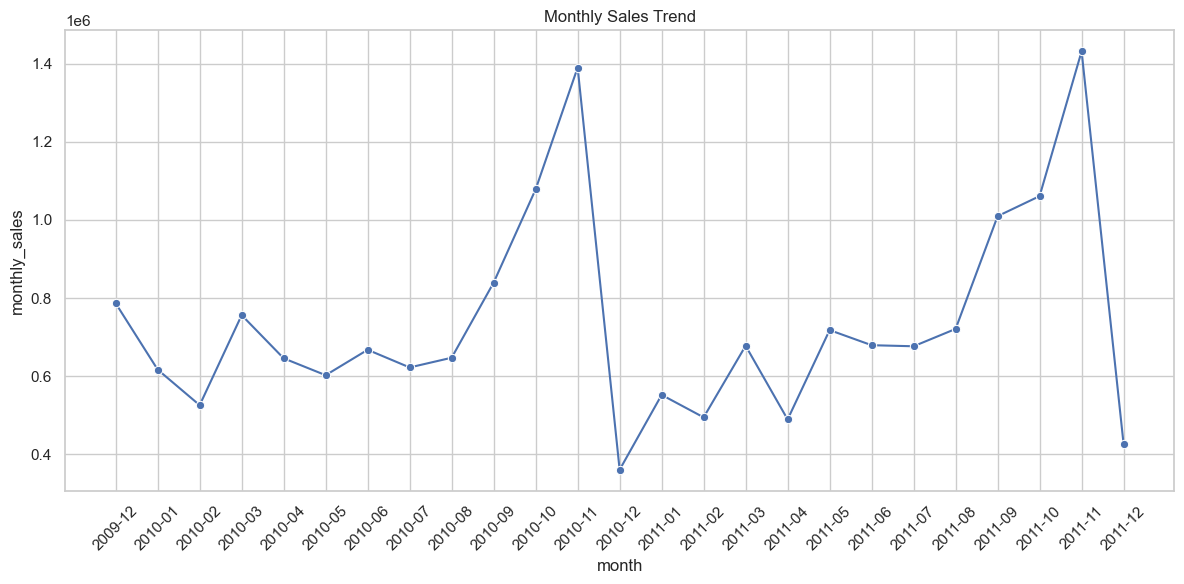

C:\Users\kaavy\AppData\Local\Temp\ipykernel_18816\1133541343.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_products, x='total_sales', y='product_description', palette="viridis")


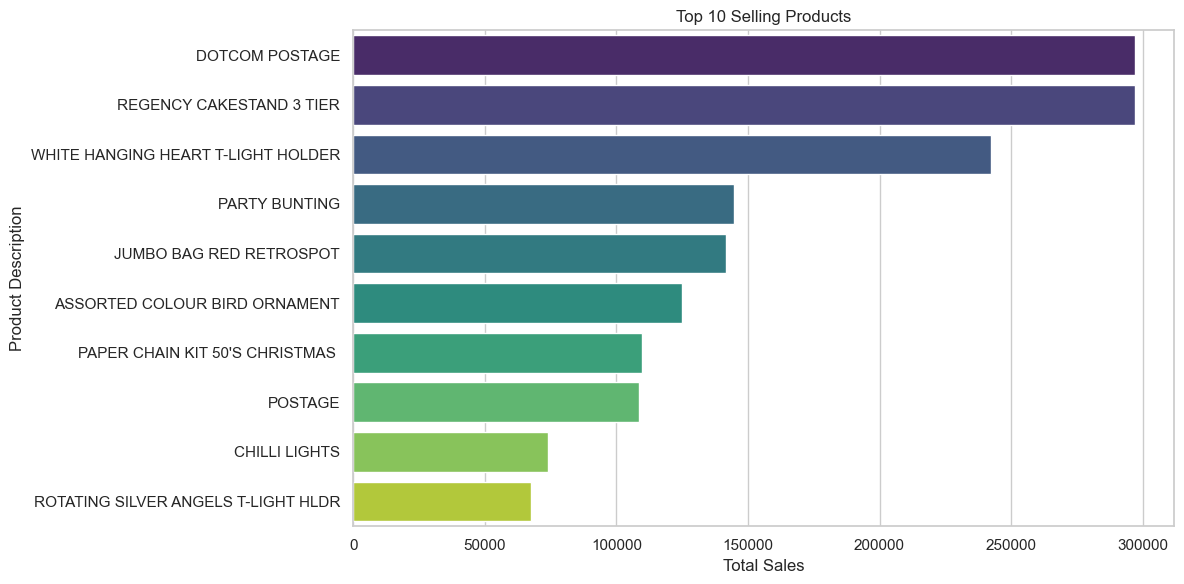

C:\Users\kaavy\AppData\Local\Temp\ipykernel_18816\1133541343.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_country, x='total_sales', y='country', palette='magma')


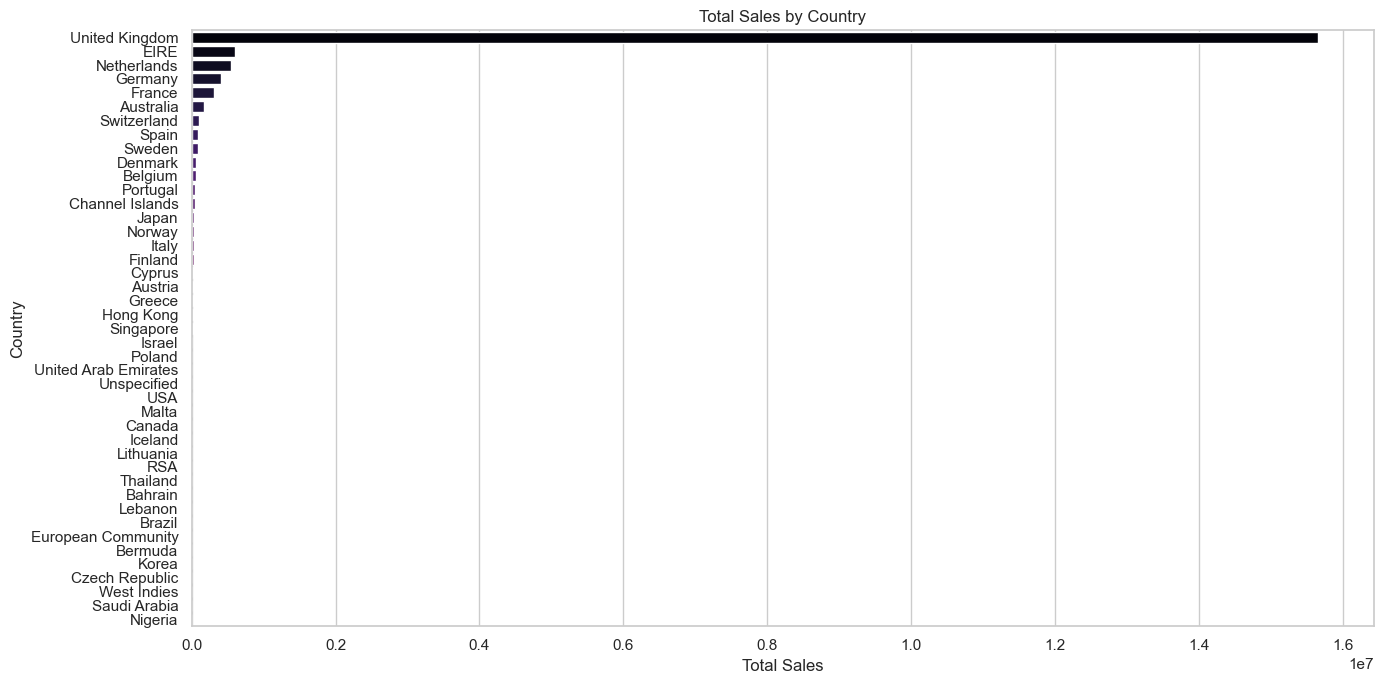

C:\Users\kaavy\AppData\Local\Temp\ipykernel_18816\1133541343.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_customers, x='customer_id', y='total_spending', palette='coolwarm')


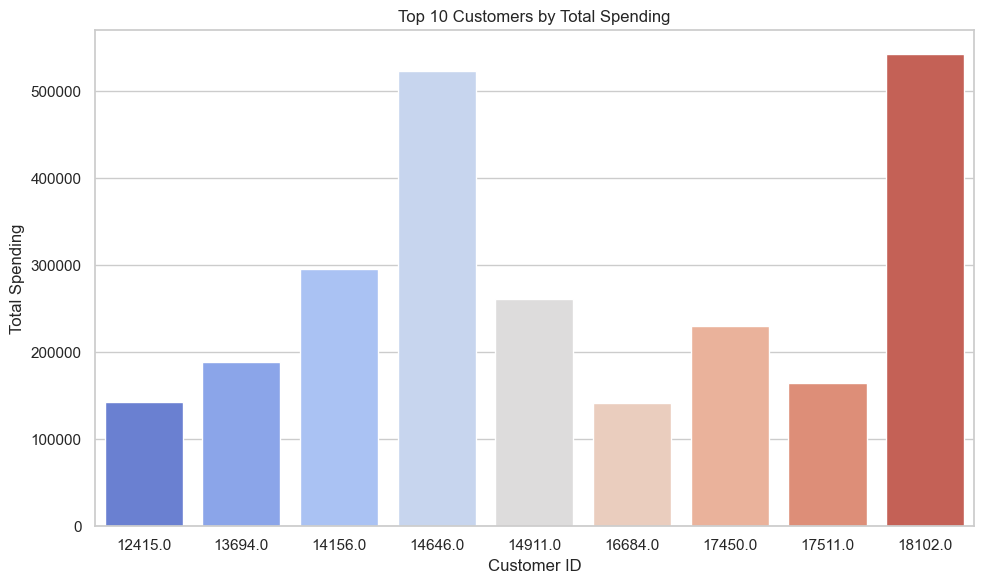

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

# Set Seaborn style
sns.set(style="whitegrid")

# Define SQL connection string
# Create the connection string
connection_string = (
    f"mssql+pyodbc://{server}/{database}"
    f"?driver={driver.replace(' ', '+')}&trusted_connection=yes"
)

# Define chart save directory
target_directory = r'D:\Data Analytics\Portfolio\retail-sales-analysis\charts'
os.makedirs(target_directory, exist_ok=True)


# Define the target directory
target_directory = r'D:\Data Analytics\Portfolio\retail-sales-analysis\charts'

# Ensure the 'charts' folder exists, or create it
if not os.path.exists(target_directory):
    os.makedirs(target_directory)


# 1. Monthly Sales Trend
query_monthly = """
SELECT 
    FORMAT(invoice_date_only, 'yyyy-MM') AS month,
    SUM(total_amount) AS monthly_sales
FROM retail_sales
GROUP BY FORMAT(invoice_date_only, 'yyyy-MM')
ORDER BY month
"""
df_monthly = pd.read_sql(query_monthly, connection_string)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='month', y='monthly_sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(target_directory, 'sales_by_month.png'))
plt.show()


# 2. Top 10 Selling Products
query_top_products = """
SELECT TOP 10 stock_code, product_description, SUM(total_amount) AS total_sales
FROM retail_sales
GROUP BY stock_code, product_description
ORDER BY total_sales DESC
"""
df_products = pd.read_sql(query_top_products, connection_string)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_products, x='total_sales', y='product_description', palette="viridis")
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig(os.path.join(target_directory, 'top_10_products.png'))
plt.show()


# 3. Sales by Country
query_country_sales = """
SELECT country, SUM(total_amount) AS total_sales
FROM retail_sales
GROUP BY country
ORDER BY total_sales DESC
"""
df_country = pd.read_sql(query_country_sales, connection_string)

plt.figure(figsize=(14, 7))
sns.barplot(data=df_country, x='total_sales', y='country', palette='magma')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(target_directory, 'sales_by_country.png'))
plt.show()


# 4. Top 10 Customer Segments by Spending
query_top_customers = """
SELECT TOP 10 customer_id, SUM(total_amount) AS total_spending
FROM retail_sales
GROUP BY customer_id
ORDER BY total_spending DESC
"""
df_customers = pd.read_sql(query_top_customers, connection_string)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_customers, x='customer_id', y='total_spending', palette='coolwarm')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.savefig(os.path.join(target_directory, 'top_customers.png'))
plt.show()
